###Import Statements and Misc

In [ ]:
#import statements
import pandas as pd
from google.colab import drive
import os
#connect to my google drive and change the working directory to the dataset
drive.mount('/content/Drive', force_remount=True)
os.chdir('/content/Drive/My Drive/PAMAP2_Dataset/')

Mounted at /content/Drive


In [ ]:
#used to get column names
for x in range(51):
  print("'sensor_data_" + str(x) + "', ", end="")

'sensor_data_0', 'sensor_data_1', 'sensor_data_2', 'sensor_data_3', 'sensor_data_4', 'sensor_data_5', 'sensor_data_6', 'sensor_data_7', 'sensor_data_8', 'sensor_data_9', 'sensor_data_10', 'sensor_data_11', 'sensor_data_12', 'sensor_data_13', 'sensor_data_14', 'sensor_data_15', 'sensor_data_16', 'sensor_data_17', 'sensor_data_18', 'sensor_data_19', 'sensor_data_20', 'sensor_data_21', 'sensor_data_22', 'sensor_data_23', 'sensor_data_24', 'sensor_data_25', 'sensor_data_26', 'sensor_data_27', 'sensor_data_28', 'sensor_data_29', 'sensor_data_30', 'sensor_data_31', 'sensor_data_32', 'sensor_data_33', 'sensor_data_34', 'sensor_data_35', 'sensor_data_36', 'sensor_data_37', 'sensor_data_38', 'sensor_data_39', 'sensor_data_40', 'sensor_data_41', 'sensor_data_42', 'sensor_data_43', 'sensor_data_44', 'sensor_data_45', 'sensor_data_46', 'sensor_data_47', 'sensor_data_48', 'sensor_data_49', 'sensor_data_50', 

###Data Preprocessing

In [ ]:
Activity_id_to_name = {1: 'lying',
2: 'sitting',
3: 'standing',
4: 'walking',
5: 'running',
6: 'cycling',
7: 'Nordic walking',
9: 'watching TV',
10: 'computer work',
11: 'car driving',
12: 'ascending stairs',
13: 'descending stairs',
16: 'vacuum cleaning',
17: 'ironing',
18: 'folding laundry',
19: 'house cleaning',
20: 'playing soccer',
24: 'rope jumping',
0: 'other (transient activities)'}

In [ ]:
#reading in each of the participants into a dataframe in a dictionary
dataframes ={}
path = 'Protocol'
for x in os.listdir(path):
  df = pd.read_csv('Protocol/' + x, sep=' ', header=None, names=['Timestamps', 'activityID', 'heart rate (bpm)','sensor_data_0', 'sensor_data_1', 'sensor_data_2', 'sensor_data_3', 'sensor_data_4', 'sensor_data_5', 'sensor_data_6', 'sensor_data_7', 'sensor_data_8', 'sensor_data_9', 'sensor_data_10', 'sensor_data_11', 'sensor_data_12', 'sensor_data_13', 'sensor_data_14', 'sensor_data_15', 'sensor_data_16', 'sensor_data_17', 'sensor_data_18', 'sensor_data_19', 'sensor_data_20', 'sensor_data_21', 'sensor_data_22', 'sensor_data_23', 'sensor_data_24', 'sensor_data_25', 'sensor_data_26', 'sensor_data_27', 'sensor_data_28', 'sensor_data_29', 'sensor_data_30', 'sensor_data_31', 'sensor_data_32', 'sensor_data_33', 'sensor_data_34', 'sensor_data_35', 'sensor_data_36', 'sensor_data_37', 'sensor_data_38', 'sensor_data_39', 'sensor_data_40', 'sensor_data_41', 'sensor_data_42', 'sensor_data_43', 'sensor_data_44', 'sensor_data_45', 'sensor_data_46', 'sensor_data_47', 'sensor_data_48', 'sensor_data_49', 'sensor_data_50'])
  #append the optional activities
  if(x in os.listdir('Optional/')):
    df_append = pd.read_csv('Optional/' + x, sep=' ', header=None, names=['Timestamps', 'activityID', 'heart rate (bpm)','sensor_data_0', 'sensor_data_1', 'sensor_data_2', 'sensor_data_3', 'sensor_data_4', 'sensor_data_5', 'sensor_data_6', 'sensor_data_7', 'sensor_data_8', 'sensor_data_9', 'sensor_data_10', 'sensor_data_11', 'sensor_data_12', 'sensor_data_13', 'sensor_data_14', 'sensor_data_15', 'sensor_data_16', 'sensor_data_17', 'sensor_data_18', 'sensor_data_19', 'sensor_data_20', 'sensor_data_21', 'sensor_data_22', 'sensor_data_23', 'sensor_data_24', 'sensor_data_25', 'sensor_data_26', 'sensor_data_27', 'sensor_data_28', 'sensor_data_29', 'sensor_data_30', 'sensor_data_31', 'sensor_data_32', 'sensor_data_33', 'sensor_data_34', 'sensor_data_35', 'sensor_data_36', 'sensor_data_37', 'sensor_data_38', 'sensor_data_39', 'sensor_data_40', 'sensor_data_41', 'sensor_data_42', 'sensor_data_43', 'sensor_data_44', 'sensor_data_45', 'sensor_data_46', 'sensor_data_47', 'sensor_data_48', 'sensor_data_49', 'sensor_data_50'])
    df = pd.concat([df, df_append])
  #dropping the invalid columns from the dataset and sort
  df = df.drop(['sensor_data_14', 'sensor_data_15', 'sensor_data_16', 'sensor_data_17', 'sensor_data_31', 'sensor_data_32', 'sensor_data_33', 'sensor_data_34', 'sensor_data_47','sensor_data_48', 'sensor_data_49', 'sensor_data_50', ], axis=1)
  df = df[df['activityID'] != 0]
  df.sort_values(by=['Timestamps'])
  dataframes[x] = df


In [ ]:
#Creating one large dataframe that can be fed into models
tot_df = pd.DataFrame()
for x in dataframes.values():
  tot_df= pd.concat([tot_df, x])

tot_df = tot_df.reset_index(drop=True)

In [ ]:
resting_heart_rate = {"101": 75, "102": 74, "103": 68, "104": 58, "105": 79, "106": 60, "107": 60, "108": 66, "109": 54}

###Data Statistics

In [ ]:
#calculating the means for each individual activity
for x in tot_df['activityID'].unique():
  mean_df = tot_df[tot_df['activityID'] == x].drop(['activityID', 'Timestamps'], axis=1)
  mean_df.dropna(axis=1)
  print('Activity: ' + Activity_id_to_name[x])
  print(mean_df.mean(skipna=True)['heart rate (bpm)'])


Activity: lying
75.53568181818181
Activity: sitting
80.01258195995038
Activity: standing
88.55763688760807
Activity: ironing
90.06959118052366
Activity: vacuum cleaning
104.1980908410282
Activity: ascending stairs
129.52348491922683
Activity: descending stairs
129.15417491921193
Activity: walking
112.78986505095016
Activity: Nordic walking
123.82870101174555
Activity: cycling
124.8799521403882
Activity: running
156.59581411049848
Activity: rope jumping
161.98139122729287
Activity: car driving
103.06701444622793
Activity: watching TV
83.40604158493527
Activity: house cleaning
96.44105595879185
Activity: folding laundry
90.26897382542985
Activity: computer work
75.73326263697419
Activity: playing soccer
168.77258930656083


In [ ]:
#calculating standard deviation for each activity
for x in tot_df['activityID'].unique():
  std_df = tot_df[tot_df['activityID'] == x].drop(['activityID', 'Timestamps'], axis=1)
  std_df.dropna(axis=1)
  print('Activity: ' + Activity_id_to_name[x])
  print(std_df.std(skipna=True)['heart rate (bpm)'])


Activity: lying
10.537418793532161
Activity: sitting
8.009912042512603
Activity: standing
10.011336772658442
Activity: ironing
8.936990270341166
Activity: vacuum cleaning
13.513390454234143
Activity: ascending stairs
20.89550853971368
Activity: descending stairs
22.956028641055994
Activity: walking
9.529361033068563
Activity: Nordic walking
10.98262689237112
Activity: cycling
8.608115969487335
Activity: running
22.79242207831182
Activity: rope jumping
21.666429704209
Activity: car driving
7.306451246423781
Activity: watching TV
5.519426146389977
Activity: house cleaning
13.47674025331078
Activity: folding laundry
11.505641267358259
Activity: computer work
8.319071019223143
Activity: playing soccer
23.676082159300833


###Data Statistic: Graphs

In [ ]:
#mean of the heart room by activityID
heart_rate = pd.DataFrame(columns=['Subject', 'ActivityID', 'Heart_Rate'])
for k, v in dataframes.items():
  for y in v['activityID'].unique():
    mean = v[v['activityID'] == y]['heart rate (bpm)'].dropna().mean()
    heart_rate.loc[len(heart_rate.index)] = [k, y, mean] 

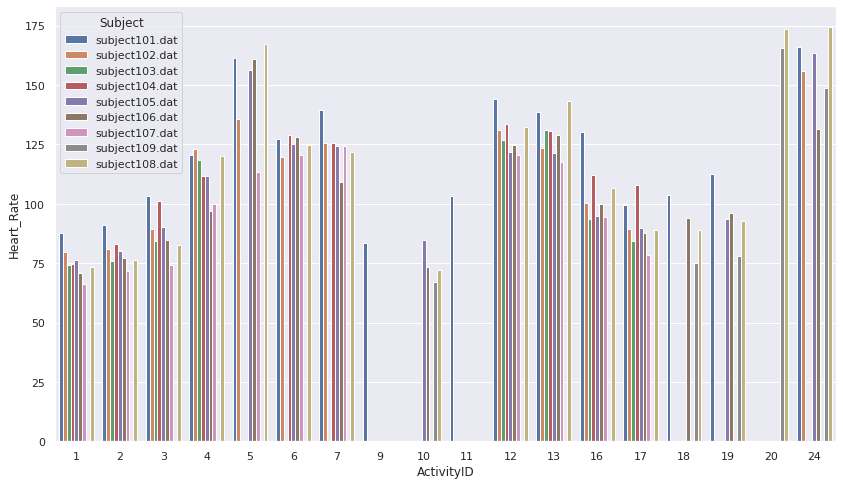

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
#All barcharts
sns.barplot(data=heart_rate, x="ActivityID", y="Heart_Rate", hue="Subject")

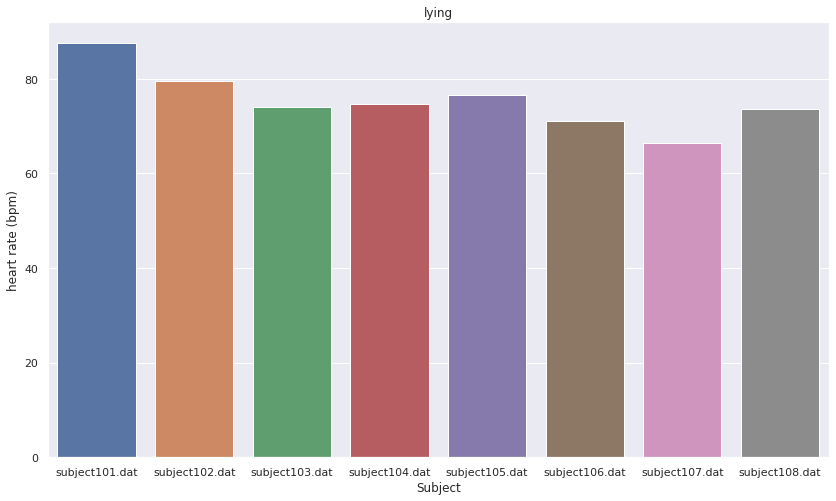

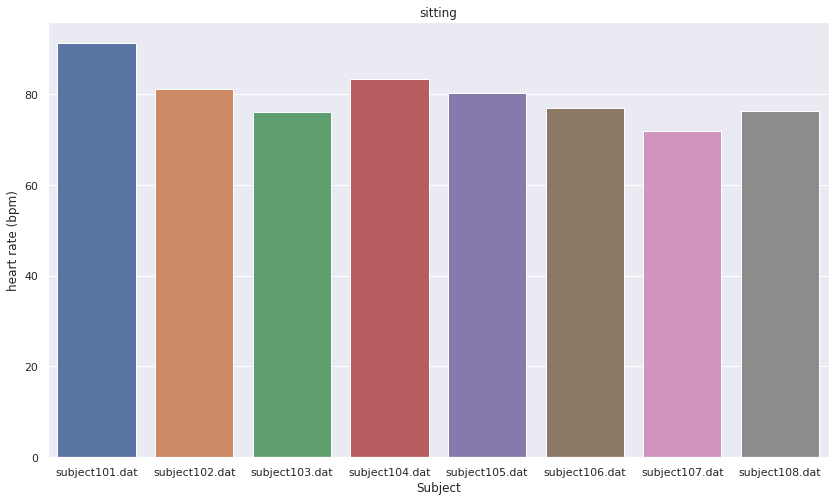

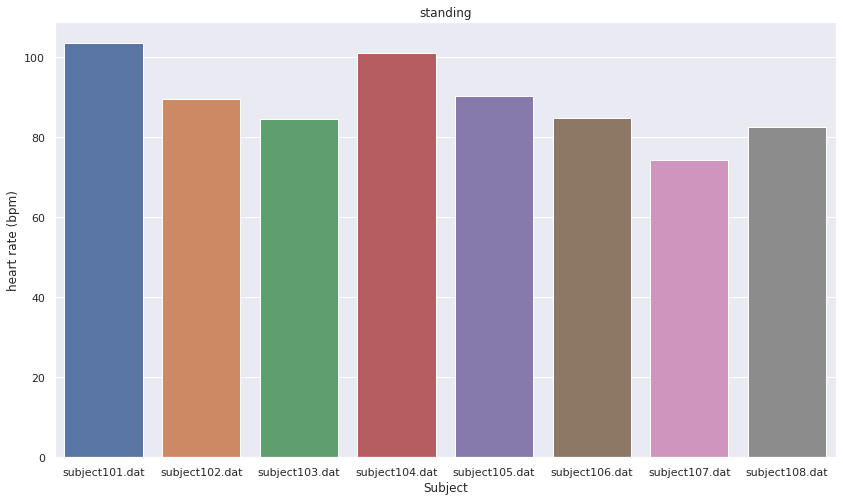

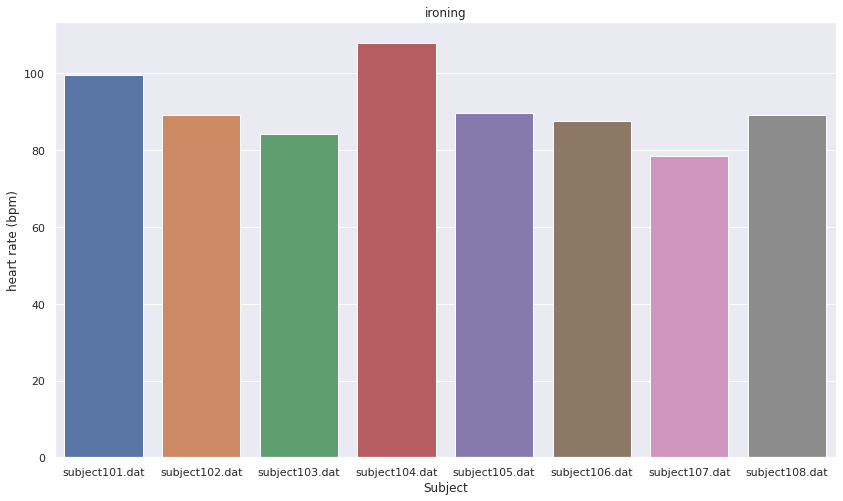

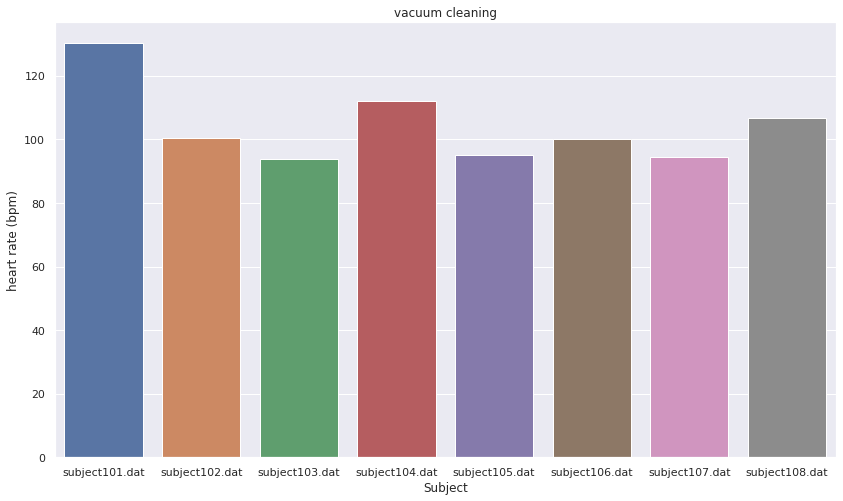

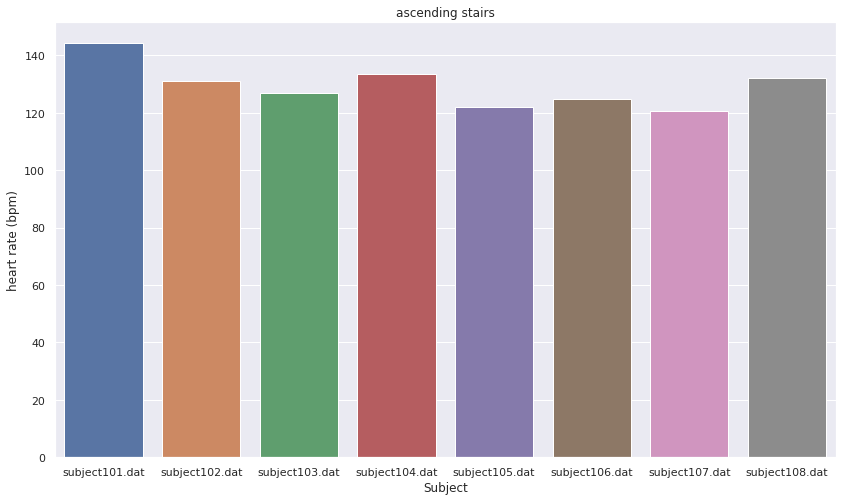

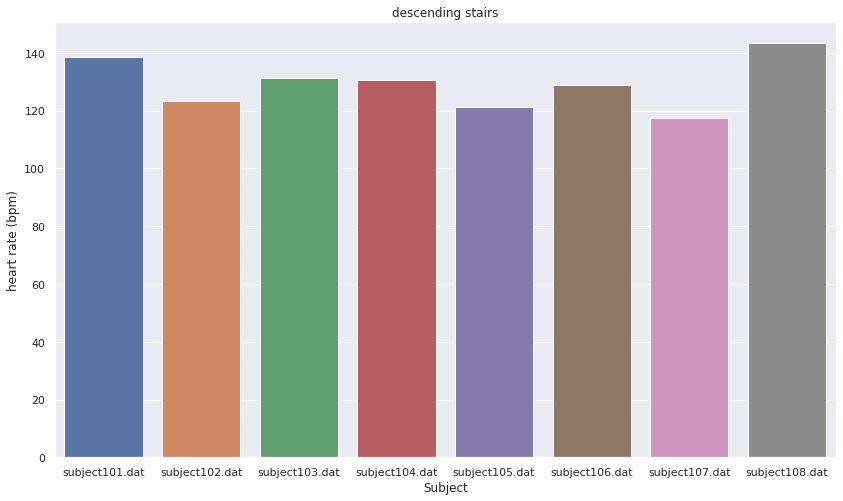

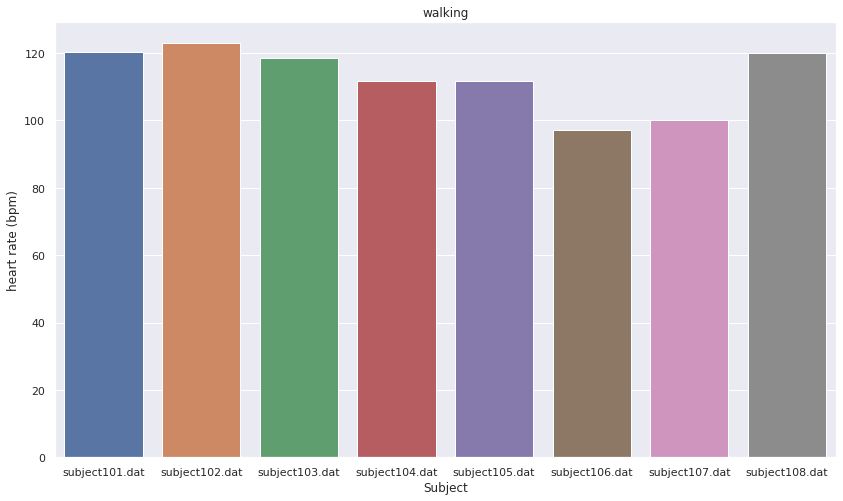

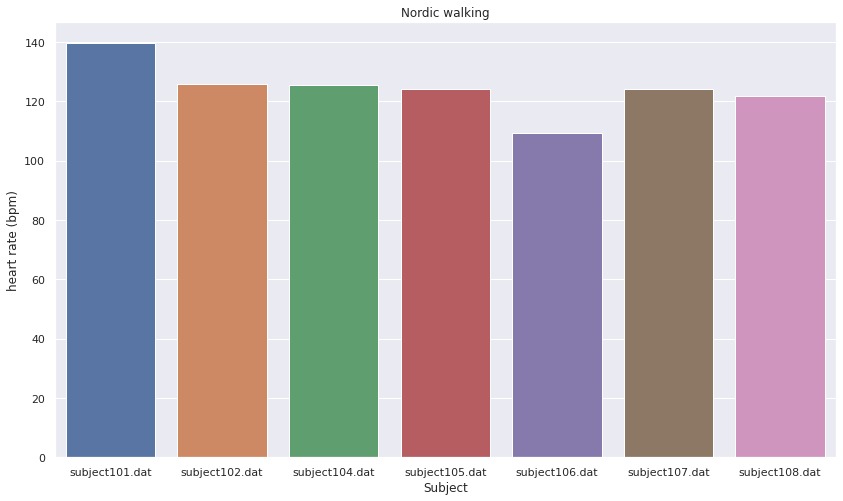

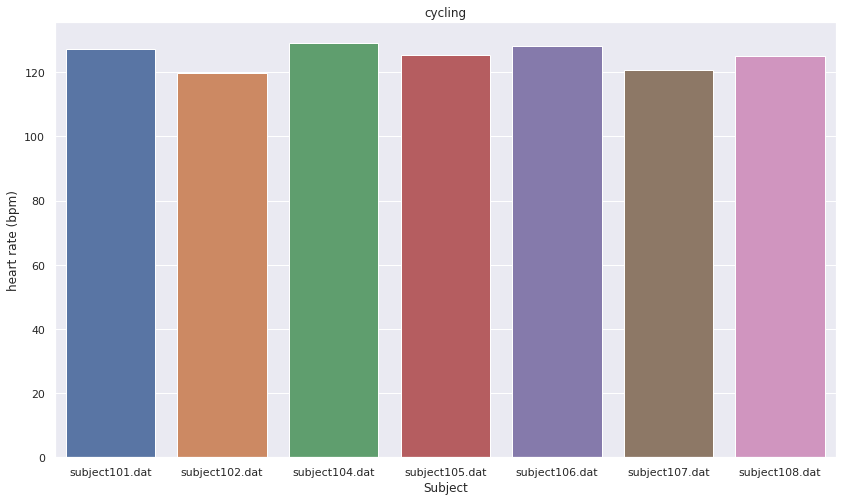

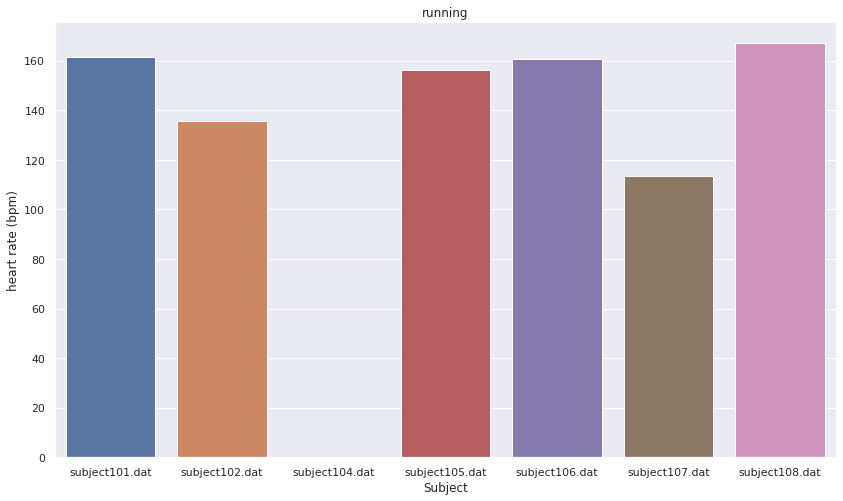

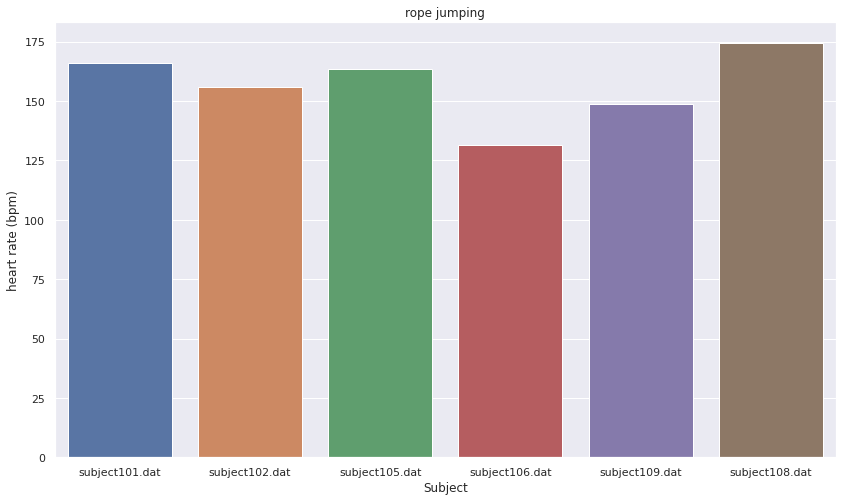

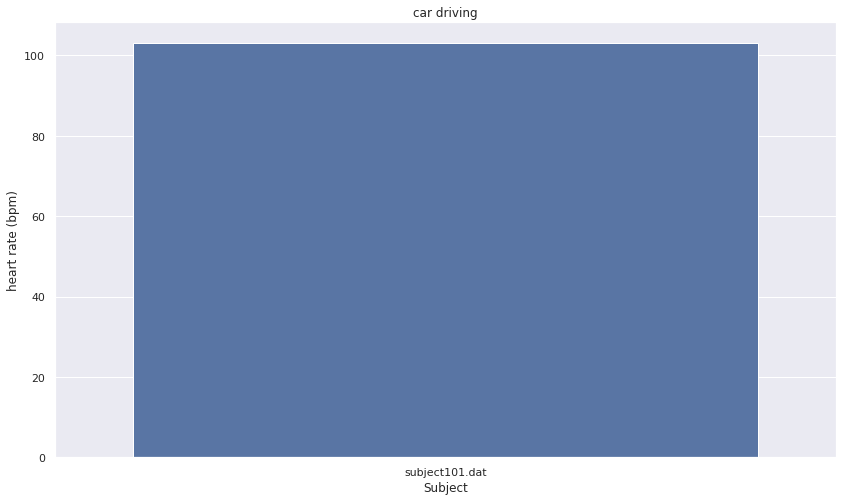

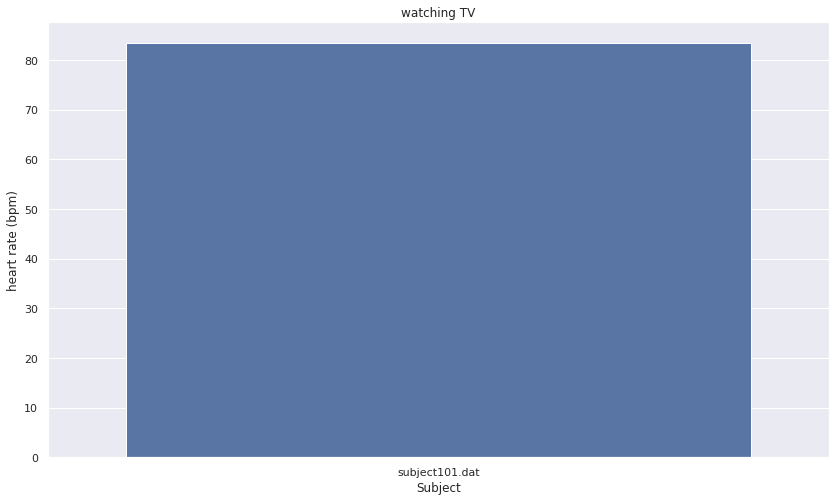

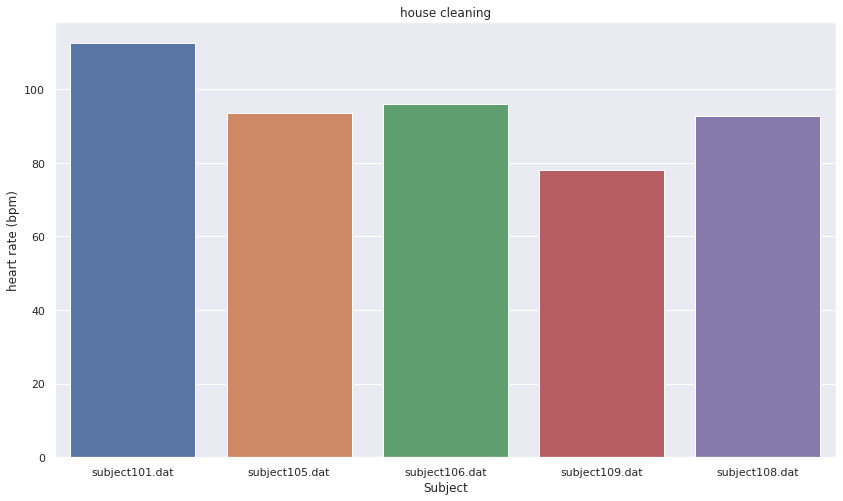

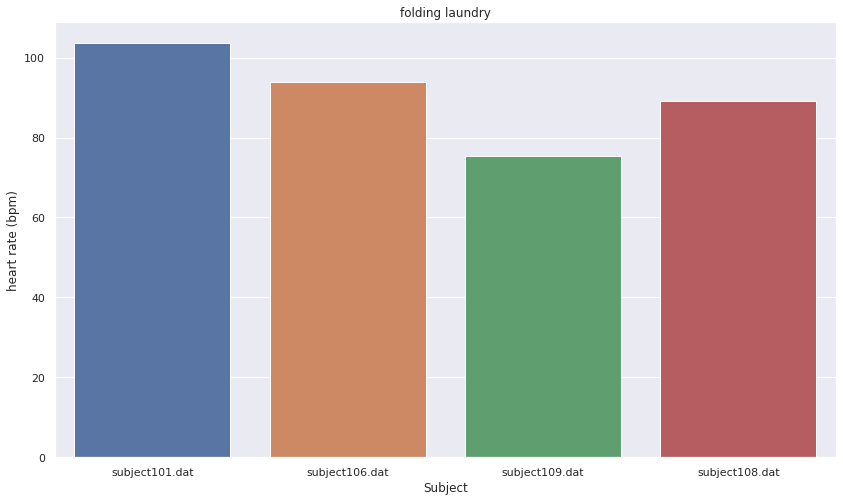

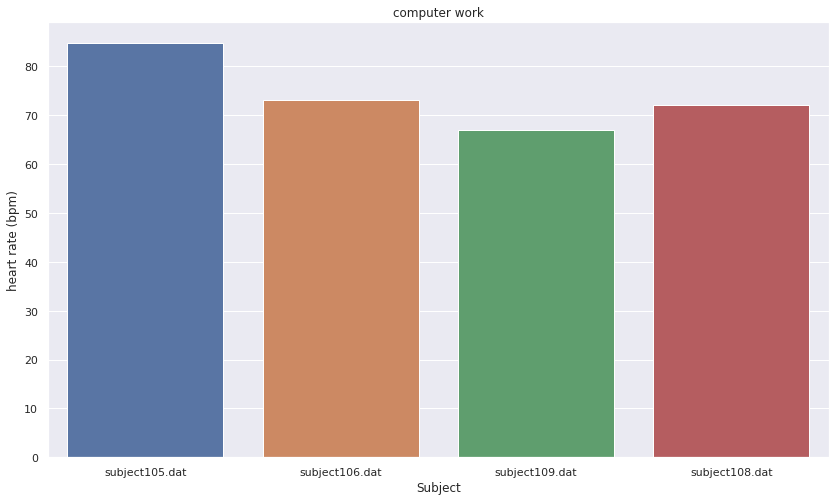

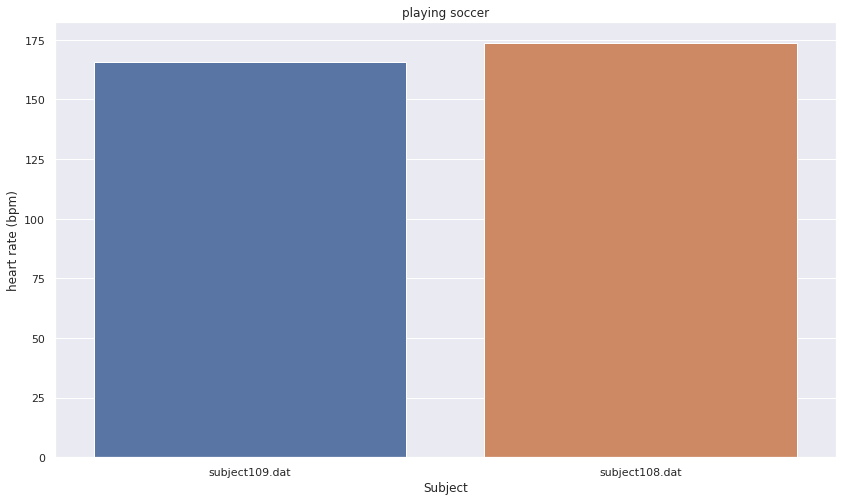

In [ ]:
#Barcharts by activityID
for x in heart_rate['ActivityID'].unique():
  df = heart_rate[heart_rate['ActivityID'] == x]
  sns.set_style('darkgrid')
  sns.set(rc={'figure.figsize':(14,8)})

  ax = sns.barplot(data=df, x="Subject", y="Heart_Rate")

  plt.ylabel('heart rate (bpm)')
  plt.xlabel('Subject')
  plt.title(Activity_id_to_name[x])
  plt.show()

In [ ]:
#standard deviation of the heart room by activityID
heart_rate = pd.DataFrame(columns=['Subject', 'ActivityID', 'Heart_Rate'])
for k, v in dataframes.items():
  for y in v['activityID'].unique():
    std = v[v['activityID'] == y]['heart rate (bpm)'].dropna().std()
    heart_rate.loc[len(heart_rate.index)] = [k, y, std] 

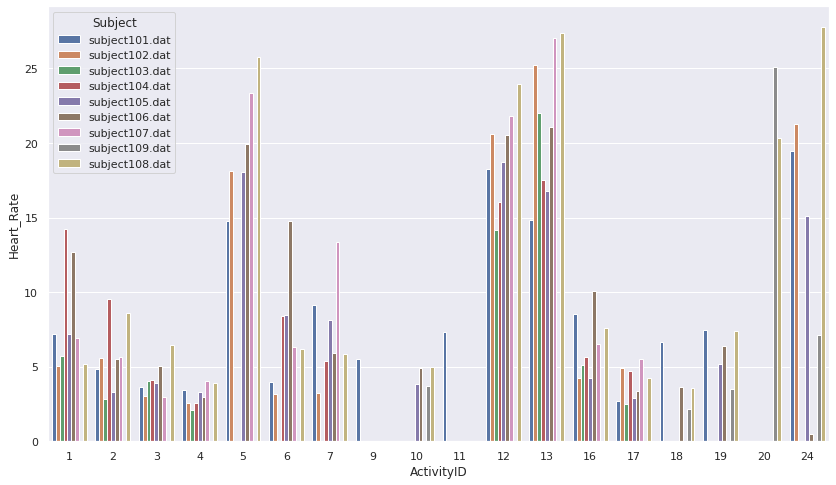

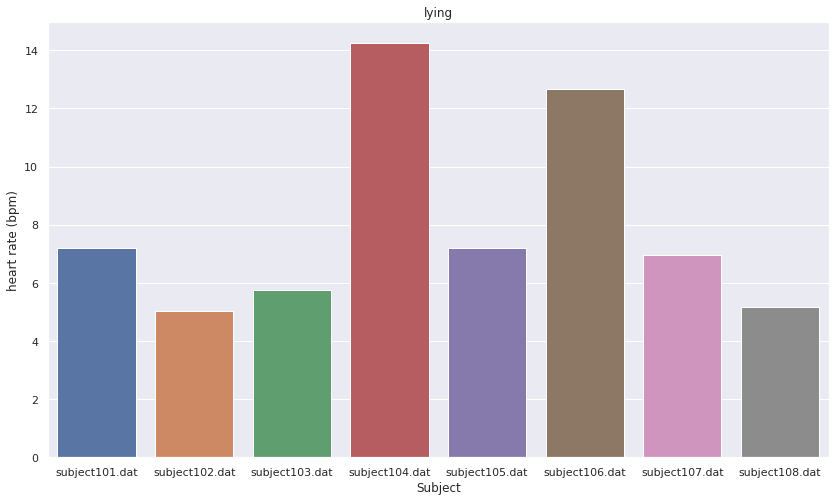

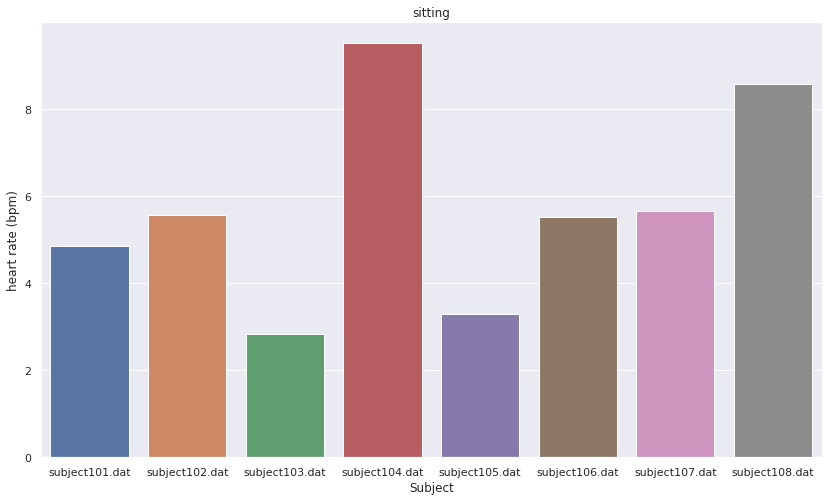

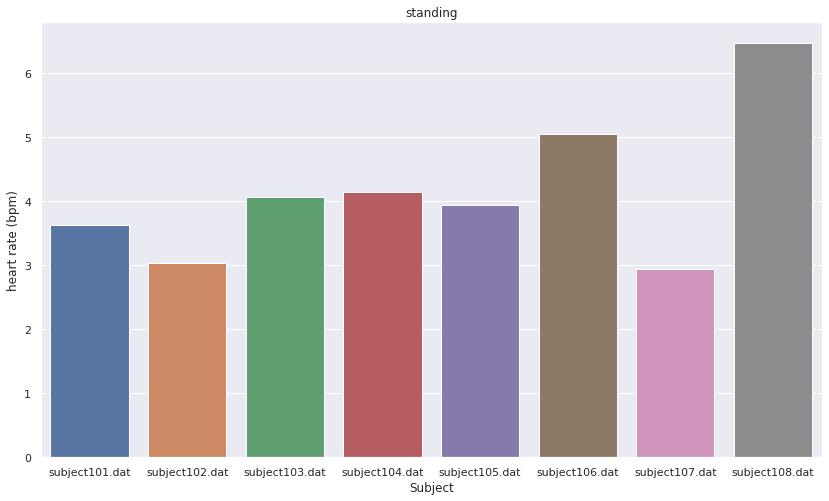

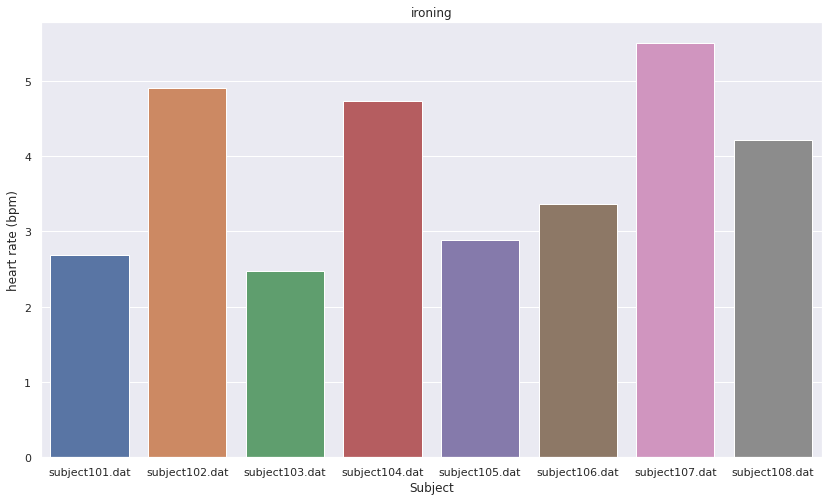

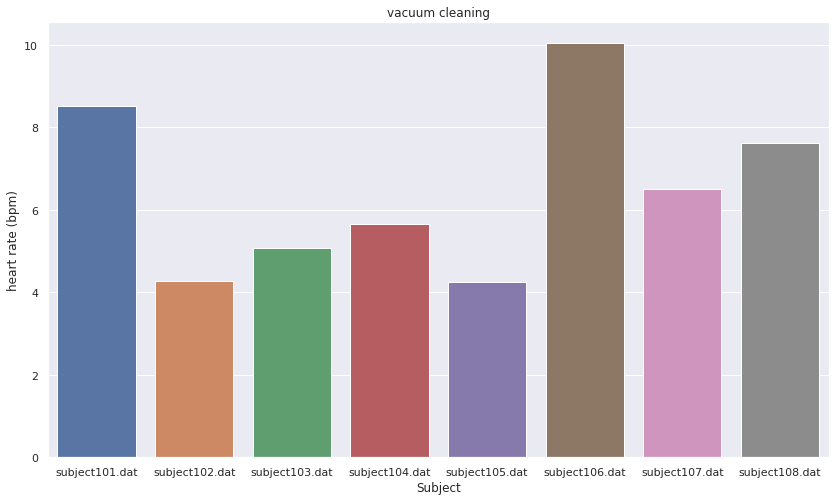

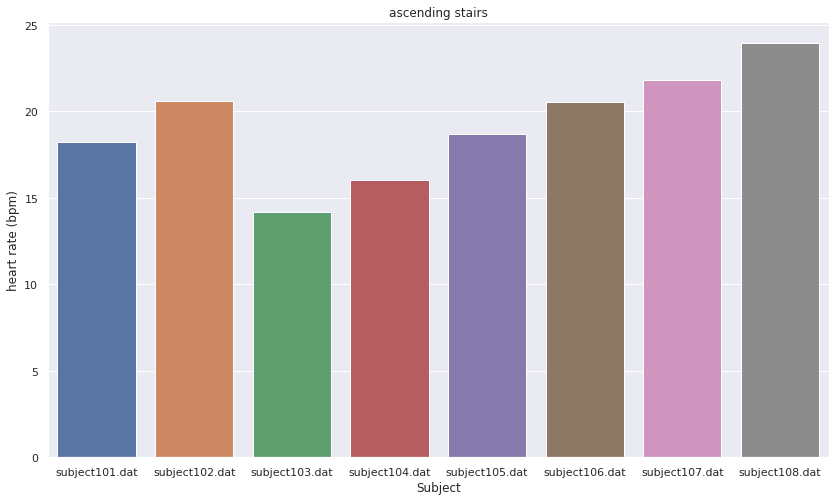

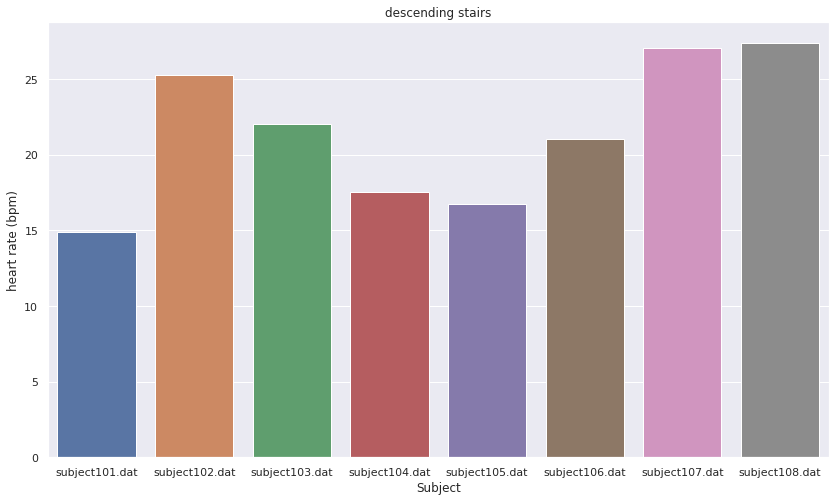

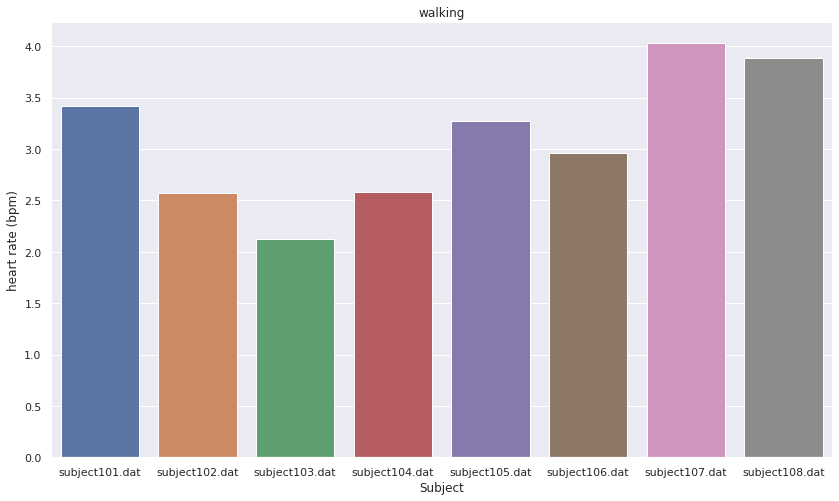

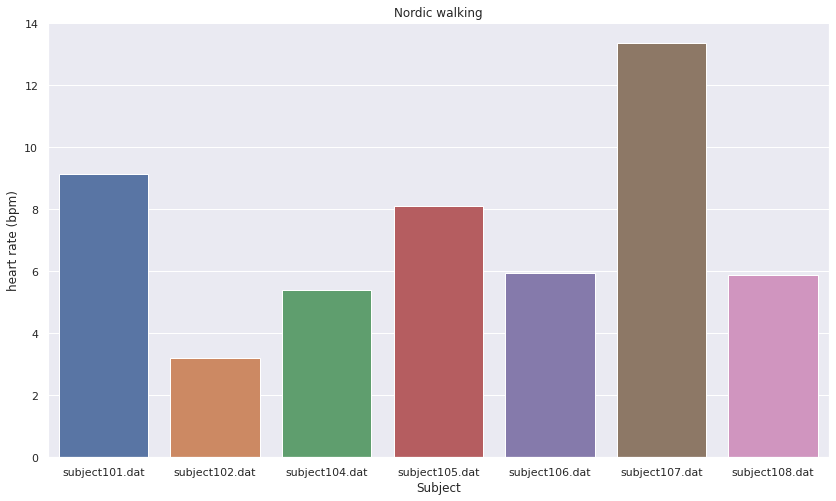

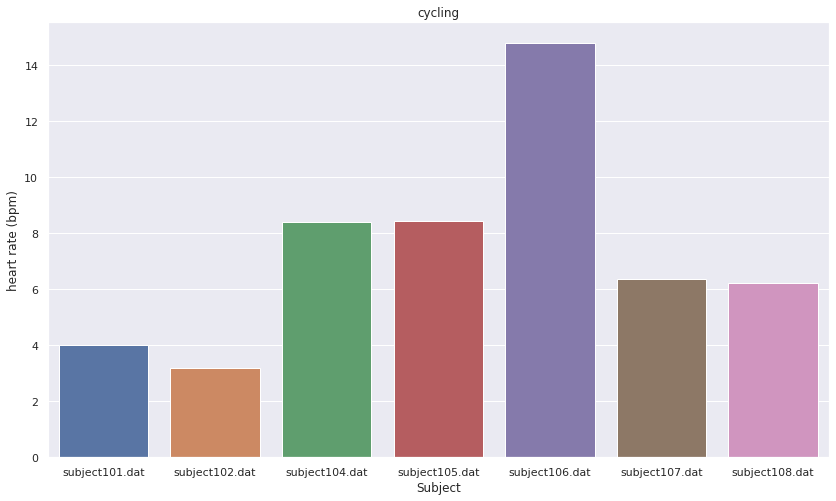

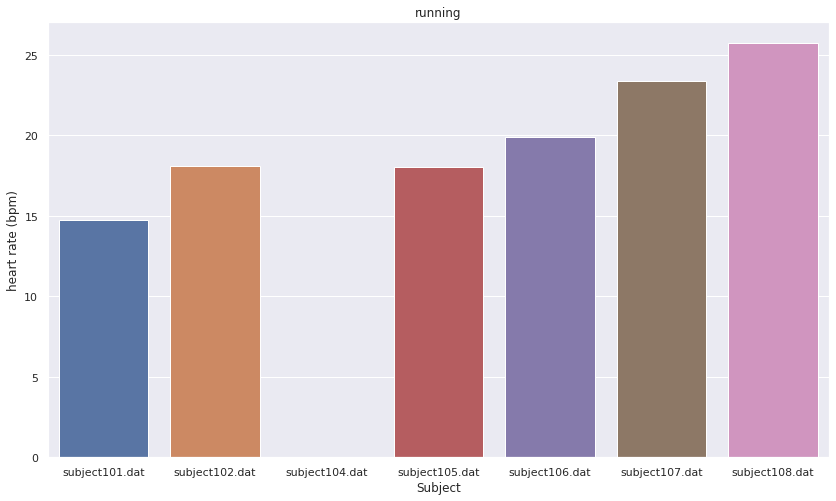

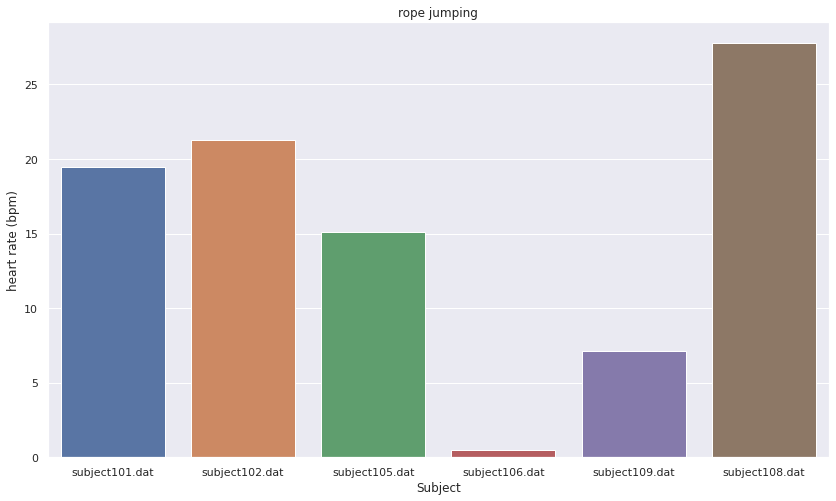

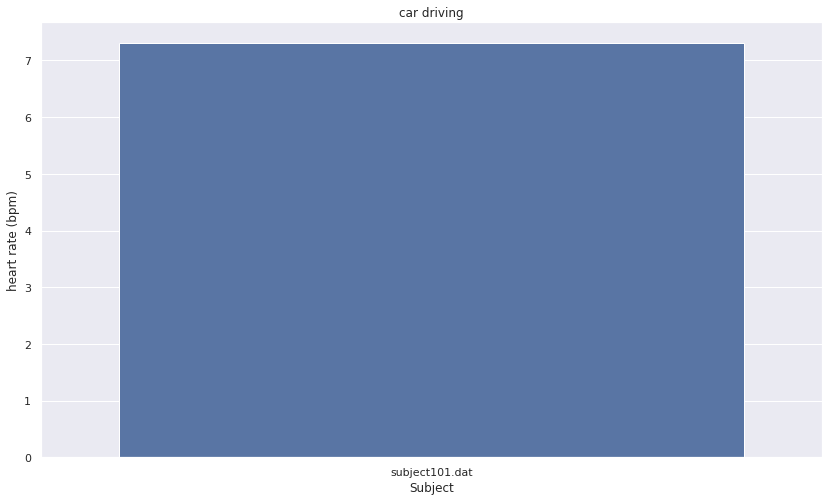

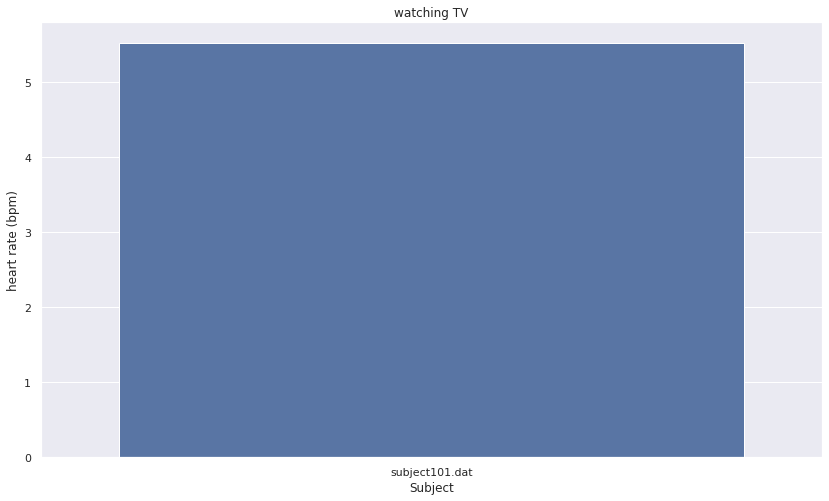

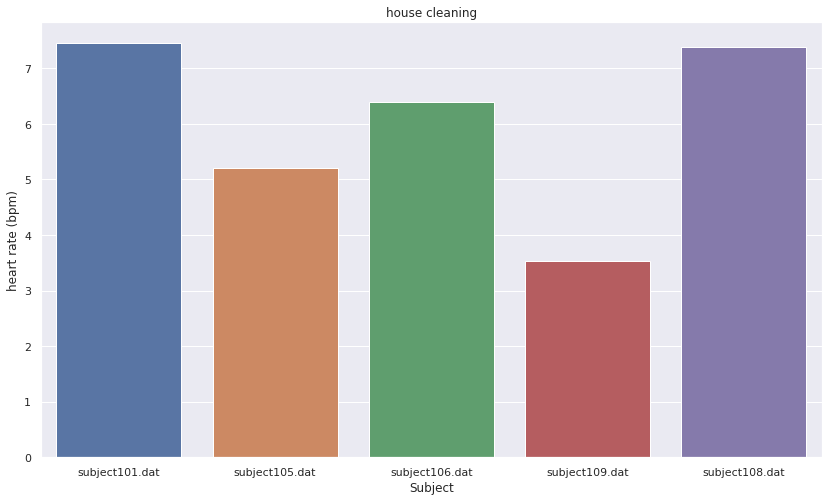

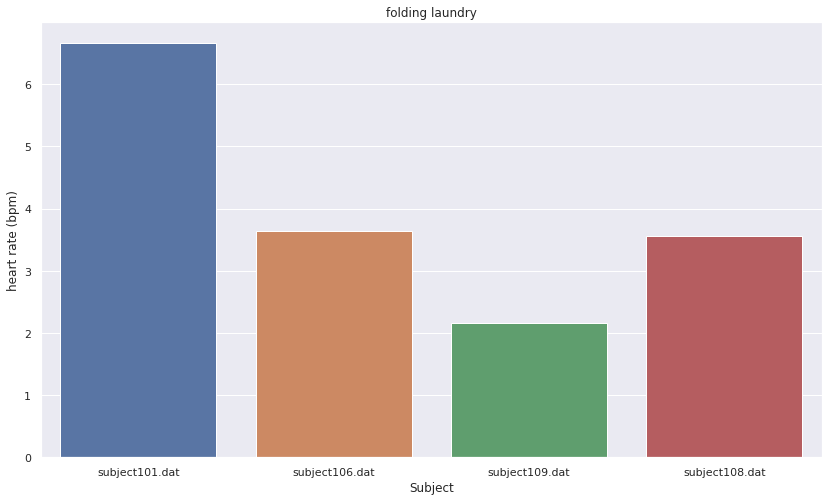

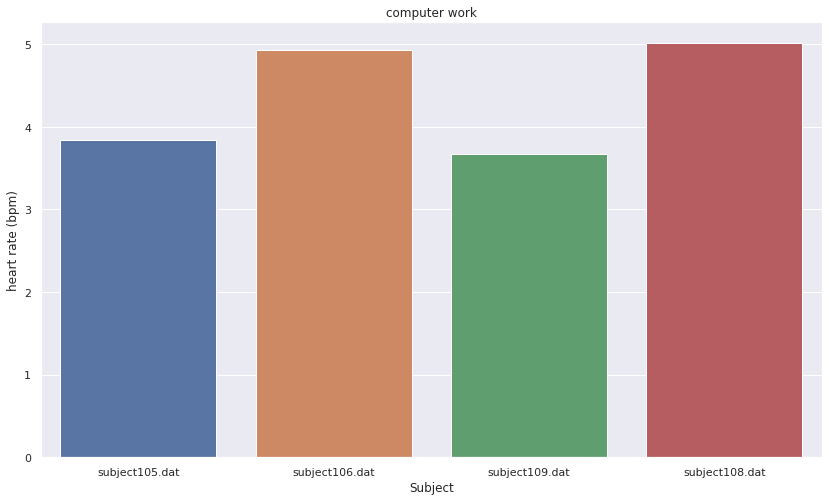

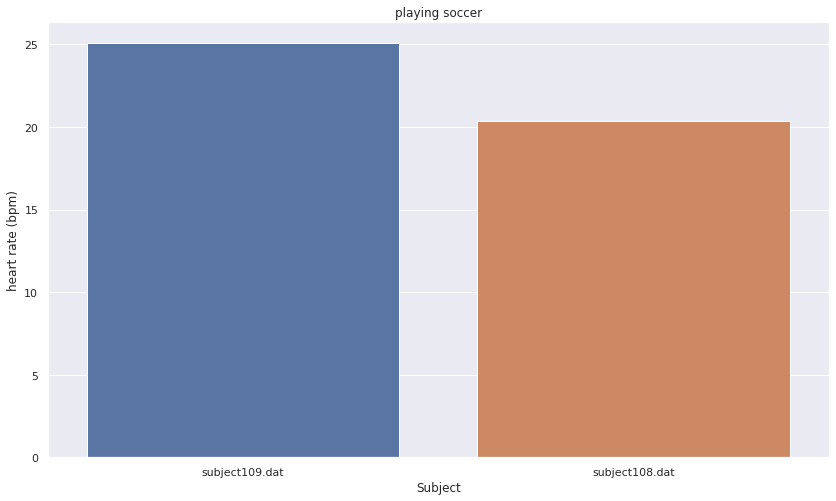

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
#All barcharts
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})
sns.barplot(data=heart_rate, x="ActivityID", y="Heart_Rate", hue="Subject")
plt.show()

#Barcharts by activityID
for x in heart_rate['ActivityID'].unique():
  df = heart_rate[heart_rate['ActivityID'] == x]
  sns.set_style('darkgrid')
  sns.set(rc={'figure.figsize':(14,8)})

  ax = sns.barplot(data=df, x="Subject", y="Heart_Rate")

  plt.ylabel('heart rate (bpm)')
  plt.xlabel('Subject')
  plt.title(Activity_id_to_name[x])
  plt.show()

When looking at the graphs for the means it's interesting to note that the averages of heart rate seem to follow the ranking of resting heart rates more or less. There are some examples where this is not the case, but it has some correlation. The standard deviation has less of a correlation to this measure. 

In [ ]:
#reading in each of the participants into a dataframe in a dictionary
dataframes ={}
path = 'Protocol'
for x in os.listdir(path):
  df = pd.read_csv('Protocol/' + x, sep=' ', header=None, names=['Timestamps', 'activityID', 'heart rate (bpm)','sensor_data_0', 'sensor_data_1', 'sensor_data_2', 'sensor_data_3', 'sensor_data_4', 'sensor_data_5', 'sensor_data_6', 'sensor_data_7', 'sensor_data_8', 'sensor_data_9', 'sensor_data_10', 'sensor_data_11', 'sensor_data_12', 'sensor_data_13', 'sensor_data_14', 'sensor_data_15', 'sensor_data_16', 'sensor_data_17', 'sensor_data_18', 'sensor_data_19', 'sensor_data_20', 'sensor_data_21', 'sensor_data_22', 'sensor_data_23', 'sensor_data_24', 'sensor_data_25', 'sensor_data_26', 'sensor_data_27', 'sensor_data_28', 'sensor_data_29', 'sensor_data_30', 'sensor_data_31', 'sensor_data_32', 'sensor_data_33', 'sensor_data_34', 'sensor_data_35', 'sensor_data_36', 'sensor_data_37', 'sensor_data_38', 'sensor_data_39', 'sensor_data_40', 'sensor_data_41', 'sensor_data_42', 'sensor_data_43', 'sensor_data_44', 'sensor_data_45', 'sensor_data_46', 'sensor_data_47', 'sensor_data_48', 'sensor_data_49', 'sensor_data_50'])
  df = df.drop(['sensor_data_14', 'sensor_data_15', 'sensor_data_16', 'sensor_data_17', 'sensor_data_31', 'sensor_data_32', 'sensor_data_33', 'sensor_data_34', 'sensor_data_47','sensor_data_48', 'sensor_data_49', 'sensor_data_50', ], axis=1)
  df = df[df['activityID'] != 0]
  df.sort_values(by=['Timestamps'])
  dataframes[x] = df

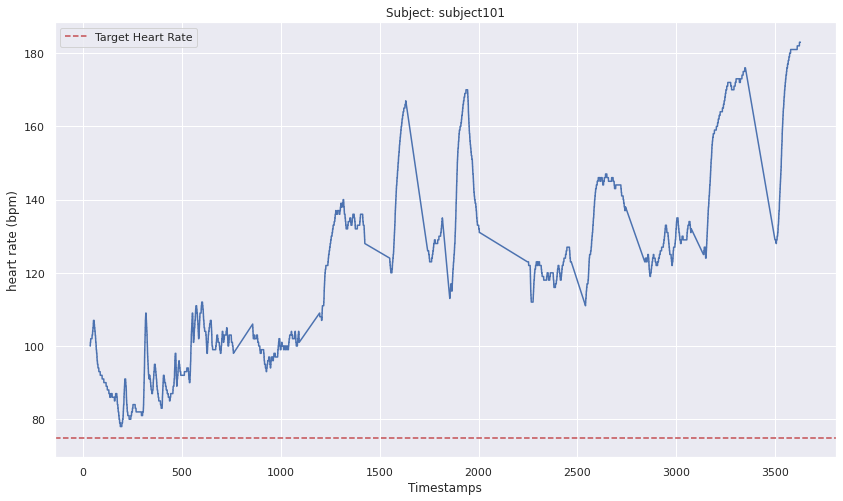

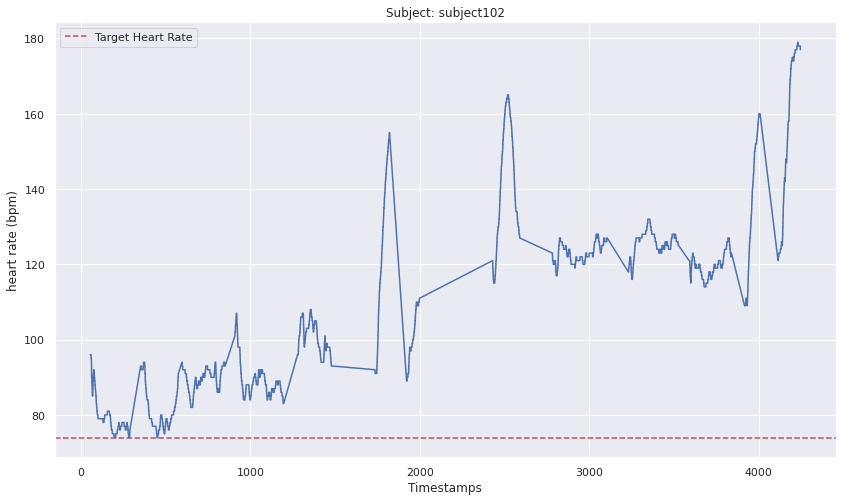

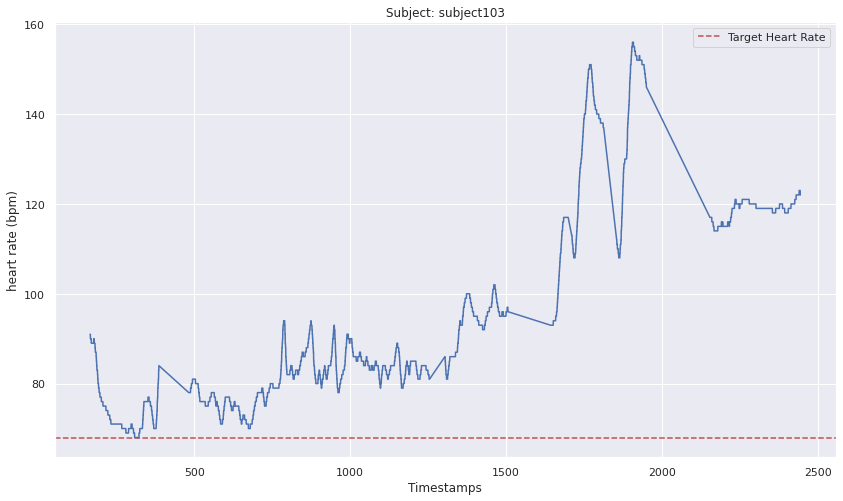

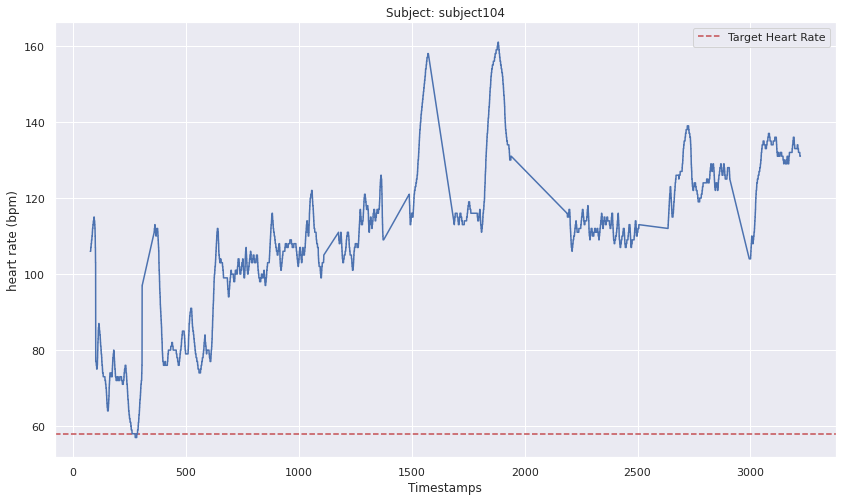

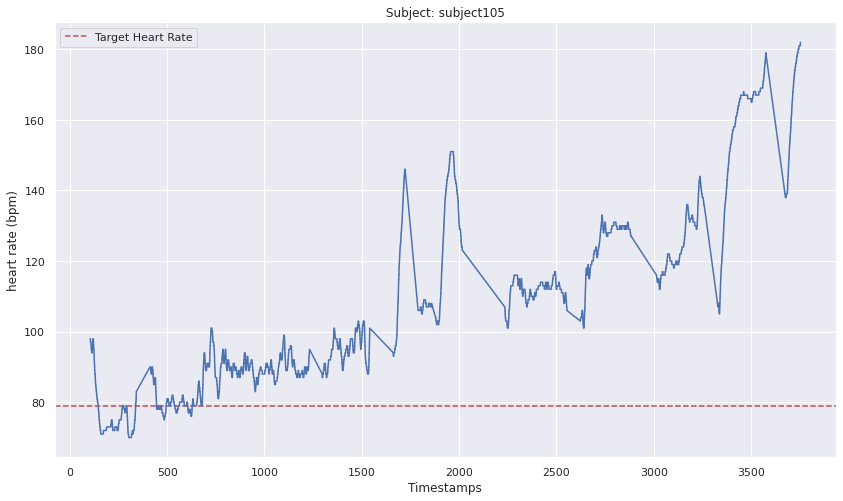

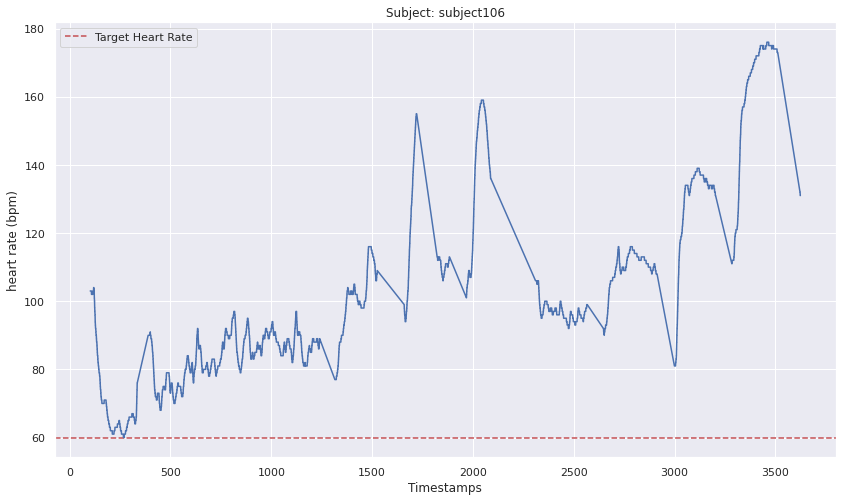

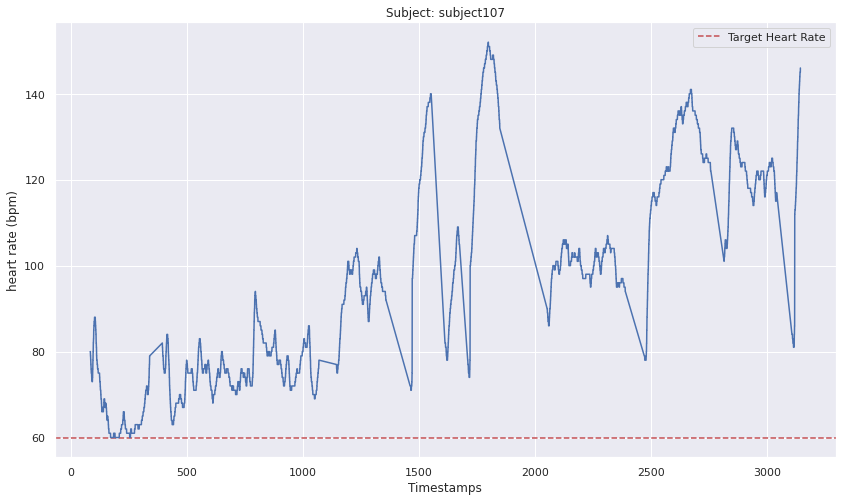

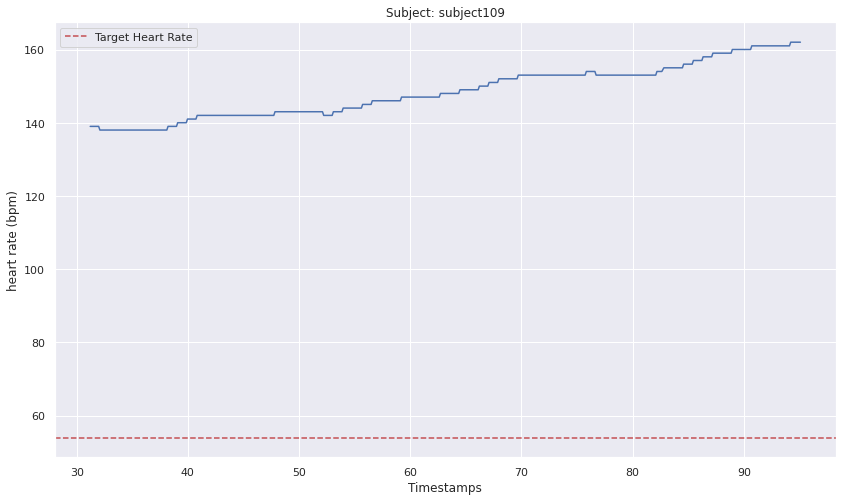

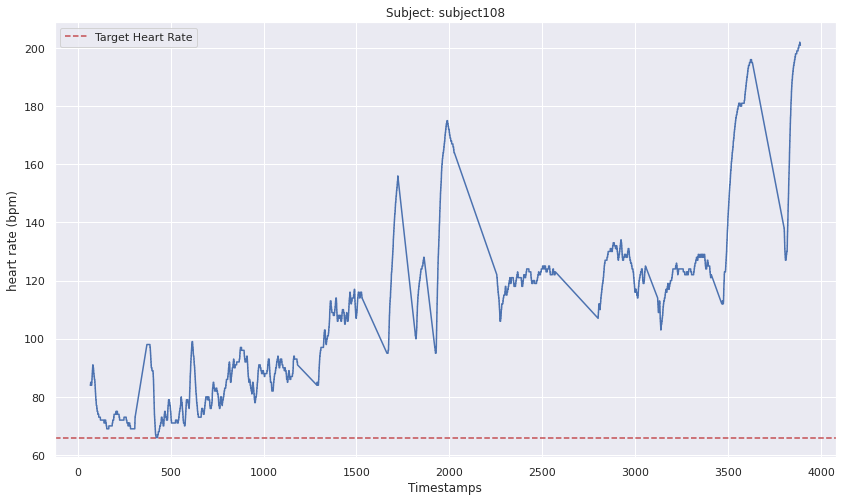

In [ ]:
for key, subject_df in dataframes.items():
  sns.set_style('darkgrid')
  sns.set(rc={'figure.figsize':(14,8)})
  plt.axhline(y=resting_heart_rate[key[7:10]], color='r', linestyle='--', label='Target Heart Rate')
  sns.lineplot(data=subject_df, x="Timestamps", y="heart rate (bpm)")
  plt.title("Subject: " + key[0:-4])
  plt.show()


Some of the more interesting data comes from the actual subject information which is not a part of the dataset. Since this is a dataset with younger people there are limitations to the conclusions. Especially because there is only one female participant. Obviously a dataset compiled from 9 participants is not a large enough sample size to make any lasting conclusions.  

## Training Models

###Running or not Running

In [ ]:
running_df = tot_df
running_df['Running_or_not'] = tot_df['activityID'] == 5
running_df['Running_or_not'] = running_df['Running_or_not'].astype(int)
running_df.drop('activityID', axis=1)


,Timestamps,heart rate (bpm),sensor_data_0,sensor_data_1,sensor_data_2,sensor_data_3,sensor_data_4,sensor_data_5,sensor_data_6,sensor_data_7,...,sensor_data_38,sensor_data_39,sensor_data_40,sensor_data_41,sensor_data_42,sensor_data_43,sensor_data_44,sensor_data_45,sensor_data_46,Running_or_not
0,8.38,104.0,30.00,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,...,9.64689,-1.55576,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.14380,0
1,8.39,NaN,30.00,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,...,9.61670,-1.61630,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.89190,-58.52530,0
2,8.40,NaN,30.00,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,...,9.63173,-1.58605,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.41380,-58.39990,0
3,8.41,NaN,30.00,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,...,9.63197,-1.63135,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.76350,-58.39560,0
4,8.42,NaN,30.00,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,...,9.64699,-1.64647,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.38790,-58.26940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850500,1809.94,NaN,30.75,-9.26266,-1.38356,1.17610,-9.23805,-1.42550,1.35031,-0.269681,...,9.01234,-2.58538,-0.485080,0.415704,0.012774,0.002431,-45.1078,-3.96252,-2.57527,0
3850501,1809.95,NaN,30.75,-9.34065,-1.34571,1.09783,-9.34405,-1.40970,1.27488,-0.252839,...,9.04195,-2.58550,-0.591183,0.411576,-0.010528,0.012442,-45.1136,-3.83432,-2.85910,0
3850502,1809.96,NaN,30.75,-9.41516,-1.19337,1.09620,-9.41940,-1.39407,1.25982,-0.214234,...,9.02701,-2.52498,-0.576164,0.341778,-0.058761,-0.018128,-45.0984,-4.47839,-2.71647,0
3850503,1809.97,NaN,30.75,-9.48833,-1.23006,1.17220,-9.46398,-1.34841,1.28997,-0.174637,...,9.05714,-2.41908,-0.561529,0.335334,-0.014601,-0.084689,-44.8707,-3.33188,-3.00066,0


####Decision tree with **Timestamp**

In [ ]:
from sklearn import tree
running_df = running_df.fillna(-1)

X = running_df.drop('Running_or_not', axis=1)
Y = running_df['Running_or_not']

#Create training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#create the decision tree
clf = tree.DecisionTreeClassifier()

#Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    750645
           1       1.00      1.00      1.00     19456

    accuracy                           1.00    770101
   macro avg       1.00      1.00      1.00    770101
weighted avg       1.00      1.00      1.00    770101

[[750645      0]
 [     1  19455]]


####Decision Tree without timestamps

In [ ]:
from sklearn import tree
running_df = running_df.fillna(-1)

X = running_df.drop(['Running_or_not', 'Timestamps'], axis=1)
Y = running_df['Running_or_not']

#Create training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#create the decision tree
clf = tree.DecisionTreeClassifier()

#Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    750645
           1       1.00      1.00      1.00     19456

    accuracy                           1.00    770101
   macro avg       1.00      1.00      1.00    770101
weighted avg       1.00      1.00      1.00    770101

[[750549     96]
 [    93  19363]]


Running vs non running is an easier task to accomplish, it is interesting to note that the model with the timestamps performed better. This might have to do with the fact for one class it is easy to use the timestamps to make generalizations. 

###Running vs Cycling

In [ ]:
import numpy as np
running_cycling_df = tot_df

condition = [running_cycling_df['activityID'] == 5, running_cycling_df['activityID'] == 6]
choices = [0, 1]
running_cycling_df['Class'] = np.select(condition, choices, default=2)

running_cycling_df['Class'] = running_cycling_df['Class'].astype(int)
running_cycling_df.drop('activityID', axis=1)
running_cycling_df


,Timestamps,activityID,heart rate (bpm),sensor_data_0,sensor_data_1,sensor_data_2,sensor_data_3,sensor_data_4,sensor_data_5,sensor_data_6,...,sensor_data_38,sensor_data_39,sensor_data_40,sensor_data_41,sensor_data_42,sensor_data_43,sensor_data_44,sensor_data_45,sensor_data_46,Class
0,37.66,1,NaN,30.375,2.21530,8.27915,5.587530,2.24689,8.55387,5.771430,...,9.63162,-1.767570,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.36960,2
1,37.67,1,NaN,30.375,2.29196,7.67288,5.744670,2.27373,8.14592,5.787390,...,9.58649,-1.752470,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.36560,2
2,37.68,1,NaN,30.375,2.29090,7.14240,5.823420,2.26966,7.66268,5.788460,...,9.60196,-1.737210,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.61190,2
3,37.69,1,NaN,30.375,2.21800,7.14365,5.899300,2.22177,7.25535,5.880000,...,9.58674,-1.782640,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.87990,2
4,37.70,1,100.0,30.375,2.30106,7.25857,6.092590,2.20720,7.24042,5.955550,...,9.64677,-1.752400,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.88470,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724948,1802.34,20,NaN,30.750,-9.67904,-2.48860,0.288379,-9.66102,-2.51059,0.522579,...,9.31704,0.103538,-3.265090,0.123540,-0.039243,0.010627,-44.4522,-10.7843,9.06518,2
2724949,1802.35,20,NaN,30.750,-9.75008,-2.41113,0.402515,-9.70598,-2.49515,0.537692,...,9.36205,0.133780,-3.280560,0.144035,-0.010783,0.005433,-44.9631,-10.7589,9.06336,2
2724950,1802.36,20,NaN,30.750,-9.77985,-2.40883,0.632986,-9.66102,-2.52568,0.537713,...,9.31720,0.224575,-3.235210,0.093930,-0.006472,0.012432,-44.3439,-10.0181,8.78101,2
2724951,1802.37,20,NaN,30.750,-9.71149,-2.48696,0.441837,-9.70548,-2.48001,0.582960,...,9.31725,0.179219,-3.219930,0.096512,-0.003575,-0.010379,-44.5932,-10.5219,8.35522,2


####Decision tree with **Timestamp**

In [ ]:
from sklearn import tree
running_cycling_df = running_cycling_df.fillna(-1)

X = running_cycling_df.drop('Class', axis=1)
Y = running_cycling_df['Class']

#Create training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#create the decision tree
clf = tree.DecisionTreeClassifier()

#Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19475
           1       1.00      1.00      1.00     32844
           2       1.00      1.00      1.00    492672

    accuracy                           1.00    544991
   macro avg       1.00      1.00      1.00    544991
weighted avg       1.00      1.00      1.00    544991

[[ 19475      0      0]
 [     0  32844      0]
 [     0      1 492671]]


####Decision Tree without timestamps

In [ ]:
from sklearn import tree
running_cycling_df = running_cycling_df.fillna(-1)

X = running_cycling_df.drop(['Class', 'Timestamps'], axis=1)
Y = running_cycling_df['Class']

#Create training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#create the decision tree
clf = tree.DecisionTreeClassifier()

#Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19475
           1       1.00      1.00      1.00     32844
           2       1.00      1.00      1.00    492672

    accuracy                           1.00    544991
   macro avg       1.00      1.00      1.00    544991
weighted avg       1.00      1.00      1.00    544991

[[ 19475      0      0]
 [     0  32844      0]
 [     0      0 492672]]


This classification task is odd because without the timestamps this model is able to perfectly classified the data. This might be because of overfitting on the data, but due to the lack of diversity in the data this is hard to overcome. 

## Activity Classification

### With the transient labels

In [ ]:
#create data and categories
from sklearn import tree
tot_df = tot_df.fillna(-1)

X = tot_df.drop('activityID', axis=1)
Y = tot_df['activityID']

#Create training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
#create the decision tree
clf = tree.DecisionTreeClassifier()

#Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89    225313
           1       0.99      0.99      0.99     38610
           2       0.98      0.98      0.98     37037
           3       0.97      0.97      0.97     37893
           4       0.81      0.81      0.81     47909
           5       0.92      0.92      0.92     19456
           6       0.90      0.89      0.90     32911
           7       0.86      0.85      0.86     37654
           9       0.99      1.00      0.99     16653
          10       0.99      0.99      0.99     61799
          11       0.99      0.99      0.99     10799
          12       0.76      0.75      0.75     23637
          13       0.73      0.71      0.72     20929
          16       0.83      0.83      0.83     34969
          17       0.92      0.92      0.92     47995
          18       0.89      0.89      0.89     20042
          19       0.87      0.88      0.87     37212
          20       0.65    

In [ ]:
#Decision Tree trained on just the acceleration data
accelerate_df = tot_df[['sensor_data_1', 'sensor_data_2', 'sensor_data_3','sensor_data_4', 'sensor_data_5', 'sensor_data_6', 'sensor_data_22', 'sensor_data_23','sensor_data_24', 'sensor_data_25', 'sensor_data_26', 'sensor_data_27', 'sensor_data_39', 'sensor_data_40', 'sensor_data_41', 'sensor_data_42', 'sensor_data_43', 'sensor_data_44']]
X = accelerate_df
Y = tot_df['activityID']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier()

#Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89    225313
           1       0.99      0.99      0.99     38610
           2       0.98      0.98      0.98     37037
           3       0.97      0.97      0.97     37893
           4       0.81      0.81      0.81     47909
           5       0.93      0.92      0.92     19456
           6       0.90      0.89      0.90     32911
           7       0.86      0.85      0.85     37654
           9       0.99      0.99      0.99     16653
          10       0.99      0.99      0.99     61799
          11       0.99      0.99      0.99     10799
          12       0.76      0.75      0.76     23637
          13       0.74      0.72      0.73     20929
          16       0.83      0.83      0.83     34969
          17       0.92      0.92      0.92     47995
          18       0.88      0.89      0.89     20042
          19       0.87      0.87      0.87     37212
          20       0.65    

In [ ]:
#KNN Model trained on just the acceleration data
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
prediction=neigh.predict(X_test)
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    225313
           1       0.99      0.99      0.99     38610
           2       0.99      1.00      1.00     37037
           3       0.99      0.99      0.99     37893
           4       0.90      0.94      0.92     47909
           5       0.97      0.97      0.97     19456
           6       0.97      0.94      0.96     32911
           7       0.96      0.94      0.95     37654
           9       1.00      1.00      1.00     16653
          10       1.00      1.00      1.00     61799
          11       1.00      1.00      1.00     10799
          12       0.93      0.92      0.93     23637
          13       0.95      0.87      0.91     20929
          16       0.96      0.94      0.95     34969
          17       0.96      0.98      0.97     47995
          18       0.96      0.97      0.96     20042
          19       0.97      0.97      0.97     37212
          20       0.95    

In [ ]:
#Reset the nan values so that they can be replaced with the averages
tot_df = pd.DataFrame()
for x in dataframes.values():
  tot_df= pd.concat([tot_df, x])

tot_df = tot_df.reset_index(drop=True)

In [ ]:
#Fills in the missing values of the dataframe with the average of the last actua value and the next actual value
import numpy as np

for x in tot_df.columns:
  timestamp = 0
  value = np.nan
  null_locs = []

  if(x == "Timestamps" or not tot_df[x].isnull().values.any()):
    continue
  for y in range(len(tot_df[x])):
    if(tot_df['Timestamps'].iloc[y] < timestamp):
      for z in null_locs:
        tot_df[x].iloc[z] = value
      null_locs = []
      
      timestamp = 0
      value = tot_df[x].iloc[y]
      null_locs = []


    if(timestamp == 0):
      timestamp = tot_df['Timestamps'].iloc[y]
      value = tot_df[x].iloc[y]
    elif(np.isnan(tot_df[x].iloc[y])):
      null_locs.append(y)
      if(y == len(tot_df[x])):
        for z in null_locs:
          tot_df[x].iloc[z] = value
    else:
      avg = (value + tot_df[x].iloc[y]) / 2
      for z in null_locs:
        tot_df[x].iloc[z] = avg
      null_locs = []

      timestamp = tot_df['Timestamps'].iloc[y]
      value = tot_df[x].iloc[y]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#write the dataframe out to a csv
tot_df.to_csv('total_dataframe.csv', sep = " ")

In [ ]:
#read in the file if it timed out
tot_df = pd.read_csv('total_dataframe.csv', sep = " ")

In [ ]:
#Decision Tree model ran with nulls replaced by -1 dropping the timestamps
from sklearn import tree
tot_df = tot_df.fillna(-1)

X = tot_df.drop(['activityID', 'Timestamps'], axis=1)
Y = tot_df['activityID']

#Create training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
#create the decision tree
clf = tree.DecisionTreeClassifier()

#Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    225313
           1       1.00      1.00      1.00     38610
           2       1.00      1.00      1.00     37037
           3       1.00      1.00      1.00     37893
           4       1.00      0.99      0.99     47909
           5       0.99      0.99      0.99     19456
           6       0.99      0.99      0.99     32911
           7       0.99      0.99      0.99     37654
           9       1.00      1.00      1.00     16653
          10       1.00      1.00      1.00     61799
          11       1.00      1.00      1.00     10799
          12       0.98      0.98      0.98     23637
          13       0.98      0.98      0.98     20929
          16       0.99      0.99      0.99     34969
          17       1.00      1.00      1.00     47995
          18       1.00      1.00      1.00     20042
          19       1.00      1.00      1.00     37212
          20       1.00    

In [ ]:
#KNN model ran on just the acceleration data with the calculated average replacements
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
prediction=neigh.predict(X_test)
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    225313
           1       0.99      0.99      0.99     38610
           2       0.99      1.00      1.00     37037
           3       0.99      0.99      0.99     37893
           4       0.91      0.95      0.93     47909
           5       0.97      0.98      0.97     19456
           6       0.98      0.94      0.96     32911
           7       0.96      0.94      0.95     37654
           9       1.00      1.00      1.00     16653
          10       1.00      1.00      1.00     61799
          11       1.00      1.00      1.00     10799
          12       0.94      0.92      0.93     23637
          13       0.95      0.87      0.91     20929
          16       0.97      0.94      0.95     34969
          17       0.96      0.98      0.97     47995
          18       0.96      0.97      0.96     20042
          19       0.97      0.97      0.97     37212
          20       0.96    

In [ ]:
#Training a decision tree model on the nan calculated replacements dropping the timestamps
tot_df = pd.read_csv('total_dataframe.csv', sep = " ")

tot_df = tot_df[tot_df['activityID'] != 0]

X = tot_df.drop(['activityID', 'Timestamps'], axis=1)
Y = tot_df['activityID']

#Create training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn import tree
#create the decision tree
clf = tree.DecisionTreeClassifier()

#Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     38350
           2       1.00      1.00      1.00     37277
           3       1.00      1.00      1.00     37875
           4       1.00      1.00      1.00     47737
           5       1.00      1.00      1.00     19475
           6       1.00      1.00      1.00     32844
           7       1.00      1.00      1.00     37746
           9       1.00      1.00      1.00     16813
          10       1.00      1.00      1.00     62049
          11       1.00      1.00      1.00     10846
          12       0.99      1.00      1.00     23529
          13       1.00      0.99      0.99     21222
          16       1.00      1.00      1.00     34635
          17       1.00      1.00      1.00     47668
          18       1.00      1.00      1.00     20071
          19       1.00      1.00      1.00     37794
          20       1.00      1.00      1.00      9319
          24       1.00    

### Without the transient labels

In [ ]:
#create data and categories
from sklearn import tree
tot_df = tot_df.fillna(-1)

X = tot_df.drop('activityID', axis=1)
Y = tot_df['activityID']

#Create training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
#create the decision tree
clf = tree.DecisionTreeClassifier()

#Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     38350
           2       1.00      1.00      1.00     37277
           3       1.00      1.00      1.00     37875
           4       1.00      1.00      1.00     47737
           5       1.00      1.00      1.00     19475
           6       1.00      1.00      1.00     32844
           7       1.00      1.00      1.00     37746
           9       1.00      1.00      1.00     16813
          10       1.00      1.00      1.00     62049
          11       1.00      1.00      1.00     10846
          12       0.99      0.99      0.99     23529
          13       0.99      0.99      0.99     21222
          16       1.00      1.00      1.00     34635
          17       1.00      1.00      1.00     47668
          18       1.00      1.00      1.00     20071
          19       1.00      1.00      1.00     37794
          20       1.00      1.00      1.00      9319
          24       1.00    

In [ ]:
#Decision Tree trained on just the acceleration data
accelerate_df = tot_df[['sensor_data_1', 'sensor_data_2', 'sensor_data_3','sensor_data_4', 'sensor_data_5', 'sensor_data_6', 'sensor_data_22', 'sensor_data_23','sensor_data_24', 'sensor_data_25', 'sensor_data_26', 'sensor_data_27', 'sensor_data_39', 'sensor_data_40', 'sensor_data_41', 'sensor_data_42', 'sensor_data_43', 'sensor_data_44']]
X = accelerate_df
Y = tot_df['activityID']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier()

#Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99     38350
           2       0.99      0.99      0.99     37277
           3       0.98      0.98      0.98     37875
           4       0.90      0.91      0.91     47737
           5       0.94      0.93      0.93     19475
           6       0.92      0.91      0.91     32844
           7       0.89      0.88      0.89     37746
           9       1.00      1.00      1.00     16813
          10       0.99      0.99      0.99     62049
          11       0.99      0.99      0.99     10846
          12       0.84      0.84      0.84     23529
          13       0.83      0.81      0.82     21222
          16       0.86      0.87      0.87     34635
          17       0.93      0.94      0.94     47668
          18       0.91      0.91      0.91     20071
          19       0.89      0.90      0.90     37794
          20       0.69      0.65      0.67      9319
          24       0.87    

In [ ]:
#Training a decision tree model on the nan calculated replacements dropping the timestamps
tot_df = pd.read_csv('total_dataframe.csv', sep = " ")

tot_df = tot_df[tot_df['activityID'] != 0]

X = tot_df.drop(['activityID', 'Timestamps'], axis=1)
Y = tot_df['activityID']

#Create training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn import tree
#create the decision tree
clf = tree.DecisionTreeClassifier()

#Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     38350
           2       1.00      1.00      1.00     37277
           3       1.00      1.00      1.00     37875
           4       1.00      1.00      1.00     47737
           5       1.00      1.00      1.00     19475
           6       1.00      1.00      1.00     32844
           7       1.00      1.00      1.00     37746
           9       1.00      1.00      1.00     16813
          10       1.00      1.00      1.00     62049
          11       1.00      1.00      1.00     10846
          12       0.99      1.00      1.00     23529
          13       1.00      0.99      0.99     21222
          16       1.00      1.00      1.00     34635
          17       1.00      1.00      1.00     47668
          18       1.00      1.00      1.00     20071
          19       1.00      1.00      1.00     37794
          20       1.00      1.00      1.00      9319
          24       1.00    

One of the best models is unsurprisingly the data with the calculated values for the averages. This data combined with dropping Timestamps (to see if it can determine the activity without using the timestamps) was used to create this model. One of the interesting things to note is that only one activity has less than 100% (rounding up) accuracy. This is descending stairs, and the only reason is that 80 examples are misclassified as ascending stairs. Which could be argued can be combined into activity. It's interesting to note the difference in performance between training just on the acceleration data vs all the data besides timestamps. This shows that the rest of the sensor data is important for performance. Another interesting trend is that the data with the calculated accuracy performs better than replacing the nans with -1. 